# Result of get_linear_join_threshold
This notebook is for viewing the results of get_linear_join_threshold.py and determining the linear join threshold.

We firstly load the environment.

In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors


%matplotlib widget

workspace_path = Path("/data/sustech/spyraline/")
run = 1025
load_path = workspace_path / "Linearjoin"
result = np.load(load_path / f"threshold_{run:04d}.npy")

Next, we check the cluster size for the two compared clusters.

Text(0, 0.5, 'Cluster 1 size')

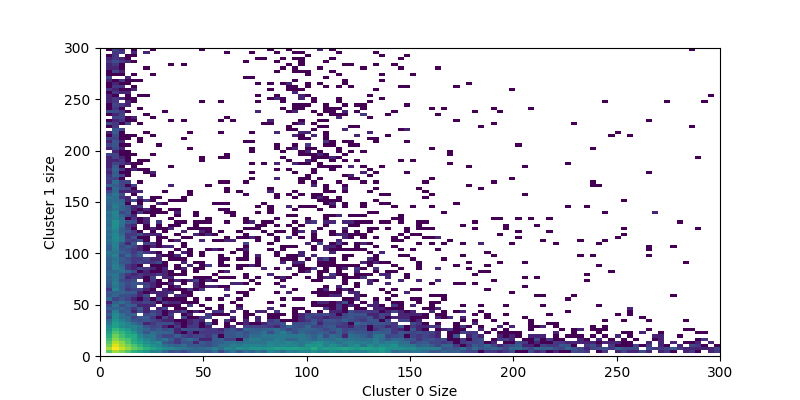

In [2]:
fig, ax = plt.subplots(1, 1, figsize=(8.0, 4.0))
ax.hist2d(result[:, 0], result[:, 1], bins=(100, 100), range=((0, 300), (0, 300)), norm=colors.LogNorm())
ax.set_xlabel("Cluster 0 Size")
ax.set_ylabel("Cluster 1 size")

Now, we check the distribution of position distances. 

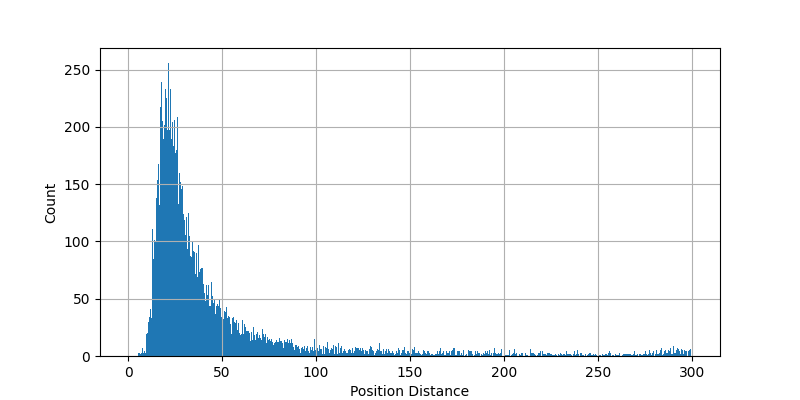

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(8.0, 4.0))
ax.hist(result[:, 2], bins=1000, range=(0.0, 300.0))
ax.set_xlabel("Position Distance")
ax.set_ylabel("Count")
ax.grid()

Then, the xz, yz slope under the minium position distance assumption in two clusters respectively. But we should have a look at the cluster size for invalid slope conditions.

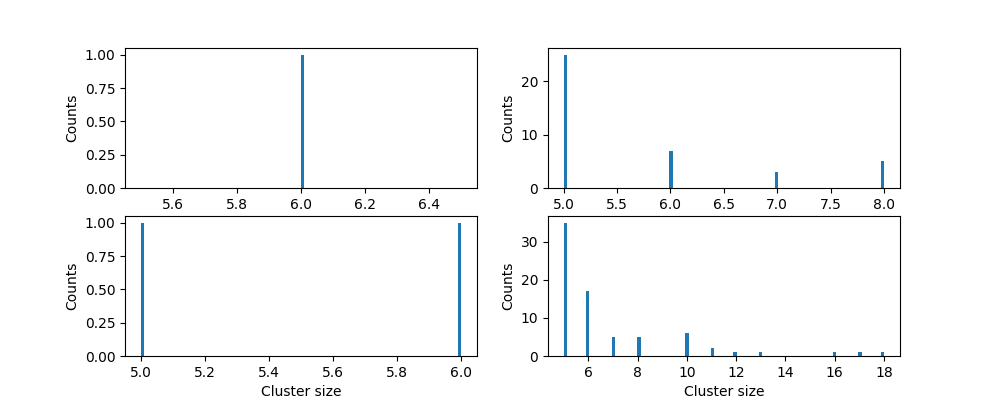

In [4]:
plt.close()
fig, axes = plt.subplots(2, 2, figsize=(10.0, 4.0))
for i in range(4):
    axes.flatten()[i].hist(result[result[:, i+3]==-1000, i//2], bins=100)
    axes.flatten()[i].set_xlabel("Cluster size")
    axes.flatten()[i].set_ylabel("Counts")
plt.show()

View the slope difference with valid value (not equal to -1000).

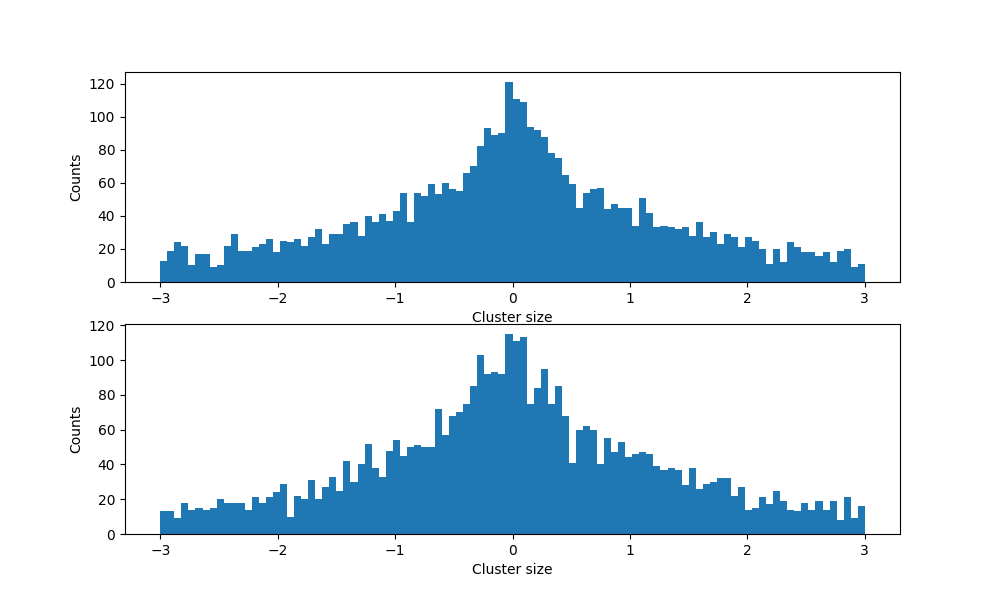

In [5]:
plt.close()
fig, axes = plt.subplots(2, 1, figsize=(10.0, 6.0))
for i in range(2):
    axes.flatten()[i].hist(
        (
            result[result[:, 0] < 8, i+3]
            - result[result[:, 0] < 8, i+5]
        ), bins=100, range=(-3,3)
    )
    axes.flatten()[i].set_xlabel("Cluster size")
    axes.flatten()[i].set_ylabel("Counts")
plt.show()

It seems useless to compare clusters with slope. Some cluster is in very small size, and the slope can't represent their shape or trend.

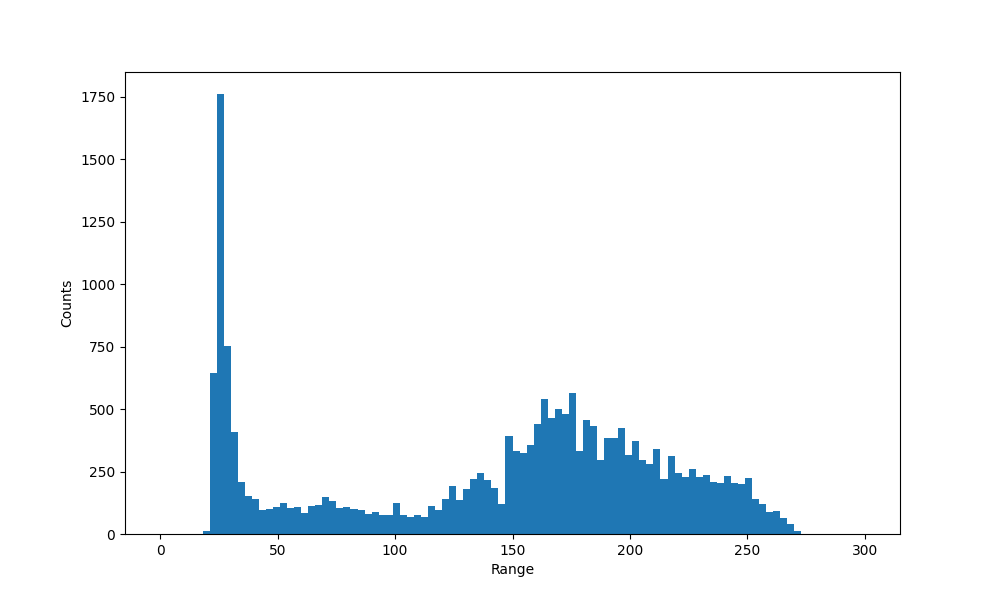

In [6]:
plt.close()
fig, ax = plt.subplots(1, 1, figsize=(10.0, 6.0))
ax.hist(result[:, 7], bins=100, range=(0,300))
ax.set_xlabel("Range")
ax.set_ylabel("Counts")
plt.show()

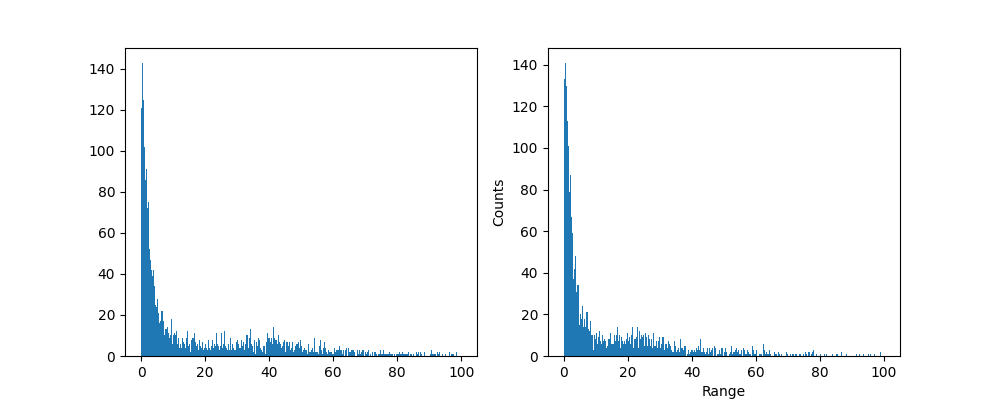

In [7]:
plt.close()
fig, axes = plt.subplots(1, 2, figsize=(10.0, 4.0))
for i, ax in enumerate(axes):
    ax.hist(result[:, 8+i], bins=1000, range=(0,100))
ax.set_xlabel("Range")
ax.set_ylabel("Counts")
plt.show()